In [34]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [61]:
def load_from_sparsed(name, samples = 800, attributes = 100000):
    matrix = -1*np.ones((samples, attributes))
    with open(name, "r") as f:
        for (i, line) in enumerate(f):
            temp = f.readline()
            temp = temp.split(" ")
            index = [int(value)-1 for value in temp[:-1]]
            matrix[i, index] = 1
    return matrix

In [62]:
training = load_from_sparsed("dorothea_train.data")
answer = np.genfromtxt("dorothea_train.labels")
#answer[np.where(answer < 0)] = 0

In [80]:
rf = RandomForestClassifier(n_estimators=attributes, n_jobs = -1)
rf.fit(training, answer)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [81]:
test = load_from_sparsed("dorothea_test.data")

In [82]:
ans = rf.predict(test)

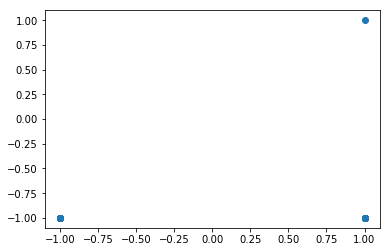

In [83]:
plt.plot(answer, ans, "o")

In [87]:
import pickle

with open('filename.pkl', 'wb') as f:
    pickle.dump(rf, f)